In [1]:
# Dataset: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis

#### INDICE
- 
- 
- 
- 

## 1. Entender el **PROBLEMA DE NEGOCIO** y trasladarlo a un **PROBLEMA TÉCNICO**

In [2]:
# Primer problema, la empresa quiere hacer perfiles de sus clientes, para poder clasificarlos y enfocar las campañas de marketing
# 1º Problema técnico: categorización - clustering

# Segundo problema, como responderá un cliente a una campaña de marketing
# 2º Problema técnico: modelo predictivo de clasificación

## 2. Decidir el **TIPO DE PROBLEMA** (a predecir)

In [3]:
# 1º No supervisado / categorización -> clustering
# 2º Supervisado / target 'response'

## Importando Librerias

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Preprocesado
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, StandardScaler
from datetime import datetime

# Modelado
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.ensemble import RandomForestRegressor 
from sklearn.linear_model import Lasso, Ridge
from catboost import CatBoostRegressor
import xgboost as xgb
import lightgbm as lgb

# PIPES
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Utils
import sys
import os
sys.path.append(os.path.join(os.getcwd(), '../utils'))
import bootcampviztools as bt

import warnings
warnings.filterwarnings('ignore')

## 3. Acceder a **DATOS**, **VISUALIZACIÓN** y **EXPLORACIÓN**

In [5]:
# Abro dataset
df = pd.read_csv("../data_sample/marketing_campaign.csv", sep = ";")
df.head(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04/09/2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08/03/2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21/08/2013,26,426,...,4,0,0,0,0,0,0,3,11,0


In [6]:
# Primer vistazo
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [7]:
bt.tipifica_variable_plus(df)

Umbral de 'CARD_valores_unicos' para considerarla 'Categórica':  10
Umbral de 'CARD_%' para considerarla 'Numérica Continua':  30.0


,Variable,Missings_%,Dtype_real,CARD_valores_unicos,CARD_%,Dtype_sugerido
0,ID,0.00,int64,2240,100.00,Numérica Continua
1,Year_Birth,0.00,int64,59,2.63,Numérica Discreta
2,Education,0.00,object,5,0.22,Categórica
3,Marital_Status,0.00,object,8,0.36,Categórica
4,Income,1.07,float64,1974,88.12,Numérica Continua
5,Kidhome,0.00,int64,3,0.13,Categórica
6,Teenhome,0.00,int64,3,0.13,Categórica
7,Dt_Customer,0.00,object,663,29.60,Numérica Discreta
8,Recency,0.00,int64,100,4.46,Numérica Discreta
9,MntWines,0.00,int64,776,34.64,Numérica Continua


| Columna/Variable    | Descripción                         | Tipo de variable  |  Nota                                        |
|---------------------|-------------------------------------|-------------------|----------------------------------------------|
| ID                  | Identificador único del cliente     |  Numérica         |  Poco util. Solo para identificar            |
| Year_Birth          | Año de nacimiento                   |  Numérica         |  Obtener edad (años)                         |
| Education           | Nivel educativo                     |  Categórica       |  Consultar equivalencias                     |
| Marital_Status      | Estado civil                        |  Categórica       |  Para hipotesis derivadas                    |
| Income              | Ingresos anuales                    |  Numérica         |  Tiene valores nulos ($ anual seguramente)   |
| Kidhome             | Número de niños (0-12) en el hogar  |  Numérica         |  Interesante para patrones de gastos         |
| Teenhome            | Número de adolescentes (13-19)      |  Numérica         |  Interesante para patrones de gastos         |
| Dt_Customer         | Fecha en la que se unió el cliente  |  Fecha            |  Mide la antiguedad                          |
| Recency             | Días desde la última compra         |  Numérica         |  Esencial para evaluar retención de clientes |
| MntWines            | Gasto en ultimos 2 años, en vinos   |  Numérica         |  Info directa sobre habito de compra ($)     |
| MntFruits           | Idem, en frutas                     |  Numérica         |  Info directa sobre habito de compra ($)     |
| MntMeatProducts     | Idem, en productos cárnicos         |  Numérica         |  Info directa sobre habito de compra ($)     |
| MntFishProducts     | Idem, en productos de pescado       |  Numérica         |  Info directa sobre habito de compra ($)     |
| MntSweetProducts    | Idem en dulces                      |  Numérica         |  Info directa sobre habito de compra ($)     |
| MntGoldProds        | Idem en productos de marca          |  Numérica         |  Info directa sobre habito de compra ($)     |
| NumDealsPurchases   | Compras con descuento               |  Numérica         |  Respuesta a los cambios de precio           |
| NumWebPurchases     | Compras a través de la web          |  Numérica         |  Interesante como info sobre canal de venta  |
| NumCatalogPurchases | Compras a través de catálogo        |  Numérica         |  Interesante como info sobre canal de venta  |
| NumStorePurchases   | Compras en tienda física            |  Numérica         |  Interesante como info sobre canal de venta  |
| NumWebVisitsMonth   | Visitas web en el último mes        |  Numérica         |  Interesante como info sobre canal de venta  |
| AcceptedCmp3        | Aceptó campaña 3                    |  Binaria          |  Mide respuesta a campañas de Marketing      |
| AcceptedCmp4        | Aceptó campaña 4                    |  Binaria          |  Mide respuesta a campañas de Marketing      |    
| AcceptedCmp5        | Aceptó campaña 5                    |  Binaria          |  Mide respuesta a campañas de Marketing      |
| AcceptedCmp1        | Aceptó campaña 1                    |  Binaria          |  Mide respuesta a campañas de Marketing      |
| AcceptedCmp2        | Aceptó campaña 2                    |  Binaria          |  Mide respuesta a campañas de Marketing      | 
| Complain            | Presentó alguna queja               |  Binaria          |  Mide respuesta a campañas de Marketing      |
| Z_CostContact       | Desconocido                         |                   |  ¿Qué representa?                            |
| Z_Revenue           | Desconocido                         |                   |  ¿Qué representa?                            |
| Response            | Respondió a la última campaña       |  Binaria          |  Mide interes reciente                       |

In [8]:
# Lista de excluidas
exclude = [] 

# Funcion para agregar y visualizar la lista
def add_to_exclude(*name_cols):
    for name_col in name_cols:
        if name_col not in exclude:
            exclude.append(name_col)
    print("Excluidas: ", exclude)

add_to_exclude("Z_CostContact", "Z_Revenue")

Excluidas:  ['Z_CostContact', 'Z_Revenue']


## 4. **Data cleaning**

- Limpieza de datos, tratamiento de valores nulos y outliers, creación de nuevas columnas, tipo de columna, renombre y orden...

### 4.1. Features analisys

#### A) *people* features

##### - 'ID'

- Cardinalidad del 100% así que la añado a la lista de exluidas para ser borrada

In [38]:
add_to_exclude("ID")

Excluidas:  ['Z_CostContact', 'Z_Revenue', 'ID', 'Year_Birth', 'Kidhome', 'Teenhome']


##### - 'Year_Birth' ('Age')

- En vez de hablar de año de nacimiento, tiene mas sentido hablar de edad, por ello se crea una columna nueva a partir de la anterior
- Se investigan outlier y su tratamiento

In [39]:
# Valores de la columna 'Year_Birth'
print("Valores columna 'Year_Birth': \n", df.Year_Birth.unique(), "\n")

# nueva Columna edad
df["Age"] = datetime.now().year - df["Year_Birth"] # datetime.now().year = Año actual [2025]

# Comprobar que todas las edades son correctas
print("Valores columna 'Age': \n", df.Age.unique(), "\n")

Valores columna 'Year_Birth': 
 [1957 1954 1965 1984 1981 1967 1971 1985 1974 1950 1983 1976 1959 1952
 1987 1946 1980 1949 1982 1979 1951 1969 1986 1989 1963 1970 1973 1943
 1975 1996 1968 1964 1977 1978 1955 1966 1988 1948 1958 1972 1960 1945
 1991 1962 1953 1961 1956 1992 1900 1893 1990 1947 1899 1993 1994 1941
 1944 1995 1940] 

Valores columna 'Age': 
 [ 68  71  60  41  44  58  54  40  51  75  42  49  66  73  38  79  45  76
  43  46  74  56  39  36  62  55  52  82  50  29  57  61  48  47  70  59
  37  77  67  53  65  80  34  63  72  64  69  33 125 132  35  78 126  32
  31  84  81  30  85] 



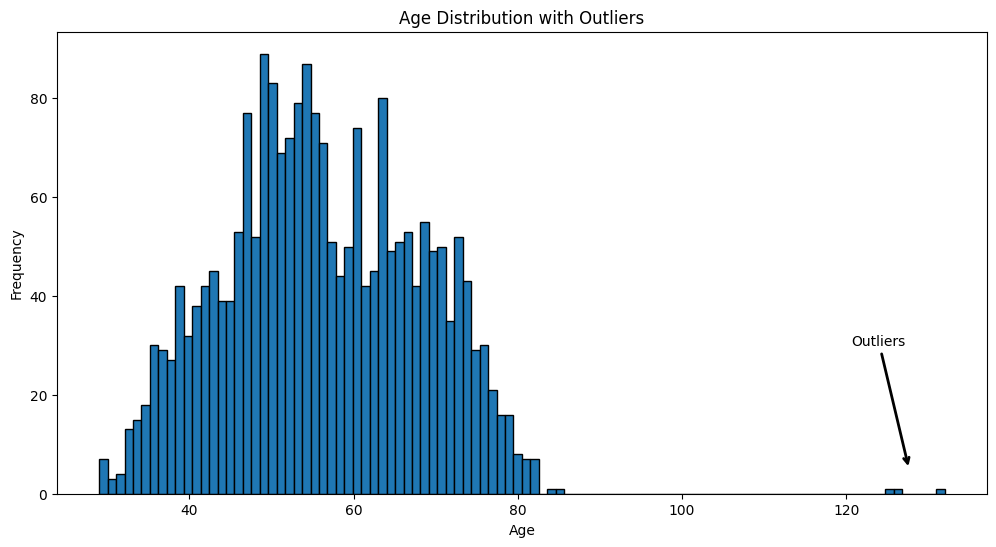

In [40]:
plt.figure(figsize=(12, 6))
df['Age'].hist(bins=100, grid=False, edgecolor="black")

# Identificar el percentil 99 para marcar los outliers
outlier_age_max = df["Age"].quantile(0.9999)

# Agregar flecha para señalar los outliers
plt.annotate(
    "Outliers", 
    xy=(outlier_age_max-3, 5),  # Coordenadas (x, y)
    xytext=(outlier_age_max-10, 30),  # Posición del texto
    arrowprops=dict(facecolor="red", arrowstyle="->", lw=2)
)

plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age Distribution with Outliers")
plt.show()

In [41]:
# Num de outliers o edades sin sentido
outliers_age = df[df["Age"] > 85]
print(outliers_age["Age"].value_counts())
df[df["Age"] > 85]

Age
125    1
132    1
126    1
Name: count, dtype: int64


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Children,Family_Size
192,7829,1900,Undergraduate,Single,36640.0,1,0,2013-09-26,99,15,...,0,0,0,1,3,11,0,125,1,2
239,11004,1893,Undergraduate,Single,60182.0,0,1,2014-05-17,23,8,...,0,0,0,0,3,11,0,132,1,2
339,1150,1899,Postgraduate,Couple,83532.0,0,0,2013-09-26,36,755,...,1,0,0,0,3,11,0,126,0,1


- Le imputaré la mediana (que difiere poco de la media)

In [42]:
print(df.Age.describe())

count    2236.000000
mean       56.203488
std        11.980604
min        29.000000
25%        48.000000
50%        55.000000
75%        66.000000
max       132.000000
Name: Age, dtype: float64


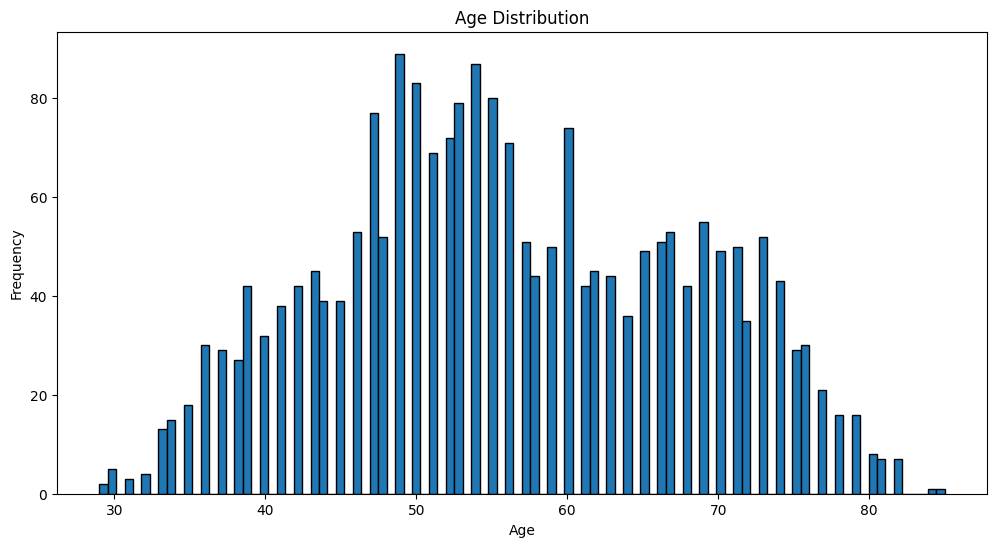

In [43]:
# Imputo con la mediana
median_age = df["Age"].median()
df.loc[df["Age"] > 85, "Age"] = median_age

# Representacion
plt.figure(figsize=(12, 6))
df['Age'].hist(bins=100, grid=False, edgecolor="black")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age Distribution")
plt.show()

In [44]:
add_to_exclude("Year_Birth")

Excluidas:  ['Z_CostContact', 'Z_Revenue', 'ID', 'Year_Birth', 'Kidhome', 'Teenhome']


##### - 'Education'

- Agrupo las clases y disminuyo categorias
- Cuando las transforme debo ordenarlas numéricamente

In [45]:
df["Education"].value_counts()

Education
Graduate         1126
Postgraduate      853
Undergraduate     257
Name: count, dtype: int64

In [46]:
# Simplifico y agrupo las categorias de Education
df["Education"] = df["Education"].replace({"Basic":"Undergraduate",
                                                 "2n Cycle":"Undergraduate", 
                                                 "Graduation":"Graduate", 
                                                 "Master":"Postgraduate", 
                                                 "PhD":"Postgraduate"})
df["Education"].value_counts()

Education
Graduate         1126
Postgraduate      853
Undergraduate     257
Name: count, dtype: int64

##### - 'Marital_Status'

- Algunas clases se pueden agrupar
- Cuando las transforme debo ordenarlas numéricamente
- Algunas clases extrañas. Se pueden imputar(o borrar)

In [47]:
df["Marital_Status"].value_counts()

Marital_Status
Couple    1444
Single     792
Name: count, dtype: int64

In [48]:
# Agrupo las categorias en Together y Single
df["Marital_Status"] = df["Marital_Status"].replace(["Married", "Together"],"Couple")
df["Marital_Status"] = df["Marital_Status"].replace(["Divorced", "Widow", "Alone"],"Single")

df["Marital_Status"].value_counts()

Marital_Status
Couple    1444
Single     792
Name: count, dtype: int64

In [49]:
df.loc[(df["Marital_Status"] == "Absurd") | (df["Marital_Status"] == "YOLO")]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Children,Family_Size


- Como son pocos, lso borro directamente. Además, una fila parece duplicada (salvo por el valor response)

In [50]:
values_to_drop = df[(df["Marital_Status"] == "Absurd") | (df["Marital_Status"] == "YOLO")].index
df.drop(index=values_to_drop, inplace=True)

df["Marital_Status"].value_counts()

Marital_Status
Couple    1444
Single     792
Name: count, dtype: int64

##### - 'Income'

- Contiene valores NaN (borrar o imputar)
- Outliers

In [51]:
# Descripción de la columna 'Income'
income_description = df['Income'].describe()

# Añadir valores NaN y tipo de columna a la descripción
income_description['NaN'] = df['Income'].isnull().sum()
income_description['Dtype'] = df['Income'].dtype

# Mostrar la descripción en un DataFrame
income_description.to_frame().T

,count,mean,std,min,25%,50%,75%,max,NaN,Dtype
Income,2236.0,51957.525659,21419.111091,1730.0,35502.5,51609.5,68275.75,162397.0,0.0,float64


- Voy a realizar una imputación sobre caso similar, respecto la columna 'Education'

In [52]:
income_mean_undergraduate = df[df["Education"] == "Undergraduate" ]["Income"].mean()
income_mean_graduate = df[df["Education"] == "Graduate" ]["Income"].mean()
income_mean_postgraduate = df[df["Education"] == "Postgraduate" ]["Income"].mean()

print("Media de ingresos para grupo 'Undergraduate': ", round(income_mean_undergraduate,2))
print("Media de ingresos para grupo 'Graduate': ", round(income_mean_graduate,2))
print("Media de ingresos para grupo 'Postgraduate': ", round(income_mean_postgraduate,2))

Media de ingresos para grupo 'Undergraduate':  41823.53
Media de ingresos para grupo 'Graduate':  52151.32
Media de ingresos para grupo 'Postgraduate':  54754.98


In [53]:
# Imputo NaN por la media correspondiente a cada grupo de Education
df.loc[(df['Education'] == 'Undergraduate') & (df['Income'].isna()), 'Income'] = income_mean_undergraduate
df.loc[(df['Education'] == 'Graduate') & (df['Income'].isna()), 'Income'] = income_mean_graduate
df.loc[(df['Education'] == 'Postgraduate') & (df['Income'].isna()), 'Income'] = income_mean_postgraduate

# Numero de valores NaN restantes
df["Income"].isna().sum()

0

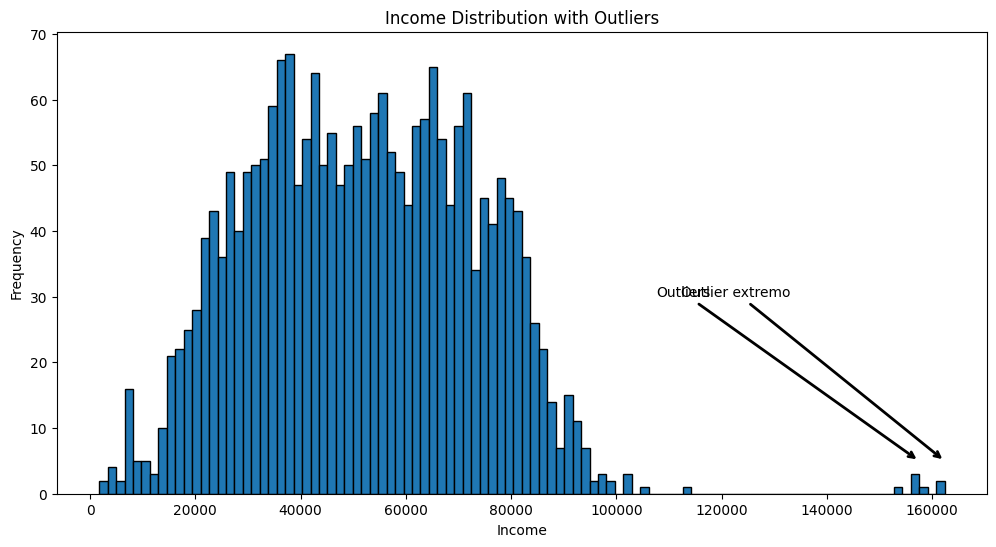

In [54]:
plt.figure(figsize=(12, 6))
df['Income'].hist(bins=100, grid=False, edgecolor="black")

# Identificar el percentil 99 para marcar los outliers
outlier_income = df["Income"].quantile(0.9989)
outlier_income_ext = df["Income"].quantile(0.999995)

# Agregar flecha para señalar los outliers
plt.annotate(
    "Outliers", 
    xy=(outlier_income, 5),  # Coordenadas (x, y)
    xytext=(outlier_income - 50000, 30),  # Posición del texto
    arrowprops=dict(facecolor="red", arrowstyle="->", lw=2)
)

# Agregar flecha para señalar los outliers extremos
plt.annotate(
    "Outlier extremo", 
    xy=(outlier_income_ext, 5),  # Coordenadas (x, y)
    xytext=(outlier_income_ext - 50000, 30),  # Posición del texto
    arrowprops=dict(facecolor="red", arrowstyle="->", lw=2)
)

plt.xlabel("Income")
plt.ylabel("Frequency")
plt.title("Income Distribution with Outliers")
plt.show()


In [55]:
# Num de outliers o edades sin sentido
outliers_income = df[df["Income"] > 115000]
print(outliers_income["Income"].value_counts(sort=True).sort_index(ascending=False))

Income
162397.0    1
160803.0    1
157733.0    1
157243.0    1
157146.0    1
156924.0    1
153924.0    1
Name: count, dtype: int64


- Imputo solo el valor extremo, de la misma forma que antes. Los otros outliers lo puedo transformar logaritmicamente luego

In [56]:
df.loc[df["Income"] > 200000]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Children,Family_Size


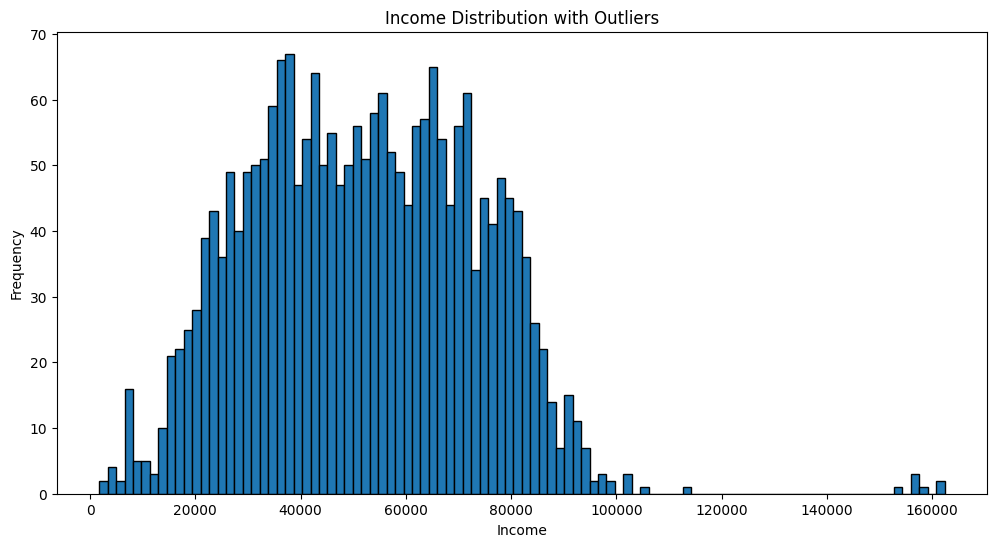

In [57]:
# Imputo con la mediana
df.loc[df["Income"] > 200000, "Income"] = income_mean_graduate

# Representacion
plt.figure(figsize=(12, 6))
df['Income'].hist(bins=100, grid=False, edgecolor="black")
plt.xlabel("Income")
plt.ylabel("Frequency")
plt.title("Income Distribution with Outliers")
plt.show()

##### - 'Kidhome' , 'Teenhome' ('Children')

- Ambas columnas se podrían tratar como una única que trata el número de hijos

In [58]:
print(df.Kidhome.value_counts(), "\n")
print(df.Teenhome.value_counts())

Kidhome
0    1289
1     899
2      48
Name: count, dtype: int64 

Teenhome
0    1156
1    1028
2      52
Name: count, dtype: int64


In [59]:
# Nueva columna "Children" definiendo el numero de hijos
df["Children"] = df["Kidhome"] + df["Teenhome"]
print(df.Children.value_counts())
pd.crosstab(df["Kidhome"], df["Teenhome"])

Children
1    1126
0     636
2     421
3      53
Name: count, dtype: int64


Teenhome,0,1,2
Kidhome,,,
0,636,623,30
1,503,374,22
2,17,31,0


In [60]:
# Añado a exclude
add_to_exclude("Kidhome", "Teenhome")

Excluidas:  ['Z_CostContact', 'Z_Revenue', 'ID', 'Year_Birth', 'Kidhome', 'Teenhome']


##### - 'Dt_customer'

- Convertir a formato fecha
- No se si la usaré

In [61]:
df["Dt_Customer"].describe()

count                             2236
mean     2013-07-10 15:56:21.037566976
min                2012-07-30 00:00:00
25%                2013-01-17 00:00:00
50%                2013-07-09 00:00:00
75%                2013-12-30 06:00:00
max                2014-06-29 00:00:00
Name: Dt_Customer, dtype: object

In [62]:
# Conversion a formato fecha
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], dayfirst=True, errors='coerce') #  la columna a tipo fecha con dayfirst=True
print(df["Dt_Customer"])

0      2012-09-04
1      2014-03-08
2      2013-08-21
3      2014-02-10
4      2014-01-19
          ...    
2235   2013-06-13
2236   2014-06-10
2237   2014-01-25
2238   2014-01-24
2239   2012-10-15
Name: Dt_Customer, Length: 2236, dtype: datetime64[ns]


##### - 'Recency'

- Recency: Dias desde la última compra
- Nada a realizar

In [63]:
df.Recency.unique()

array([58, 38, 26, 94, 16, 34, 32, 19, 68, 11, 59, 82, 53, 23, 51, 20, 91,
       86, 41, 42, 63,  0, 69, 89,  4, 96, 56, 31,  8, 55, 37, 76, 99,  3,
       88, 80, 72, 24, 92, 39, 29,  2, 54, 57, 30, 12, 18, 75, 90,  1, 25,
       40,  9, 87,  5, 95, 48, 70, 79, 45, 84, 44, 43, 35, 15, 17, 46, 27,
       74, 85, 65, 13, 83, 10, 21, 61, 73, 47, 36, 49, 28, 64, 98, 78, 77,
       81, 14, 52, 93, 50, 60, 66, 97, 62,  6, 33, 67, 22, 71,  7],
      dtype=int64)

##### - 'Complain'

- Quejas en los ultimos 2 años (0 : NO , 1: YES)

In [64]:
df.Complain.value_counts()

Complain
0    2215
1      21
Name: count, dtype: int64

##### - ('Family_size')

In [65]:
# Nueva columna "Family_Size" definiendo el numero de miembros en la familia
df["Family_Size"] = df["Children"] + (df["Marital_Status"] == 'Together') + 1
print(df.Family_Size.value_counts())

Family_Size
2    1126
1     636
3     421
4      53
Name: count, dtype: int64


#### B) *products* features

##### - "MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"

- Todas tienen una distribución similar
- Crear nueva columna con total de gastos
- Checkeo que no haya datos erroneos (cero en total de gastos)

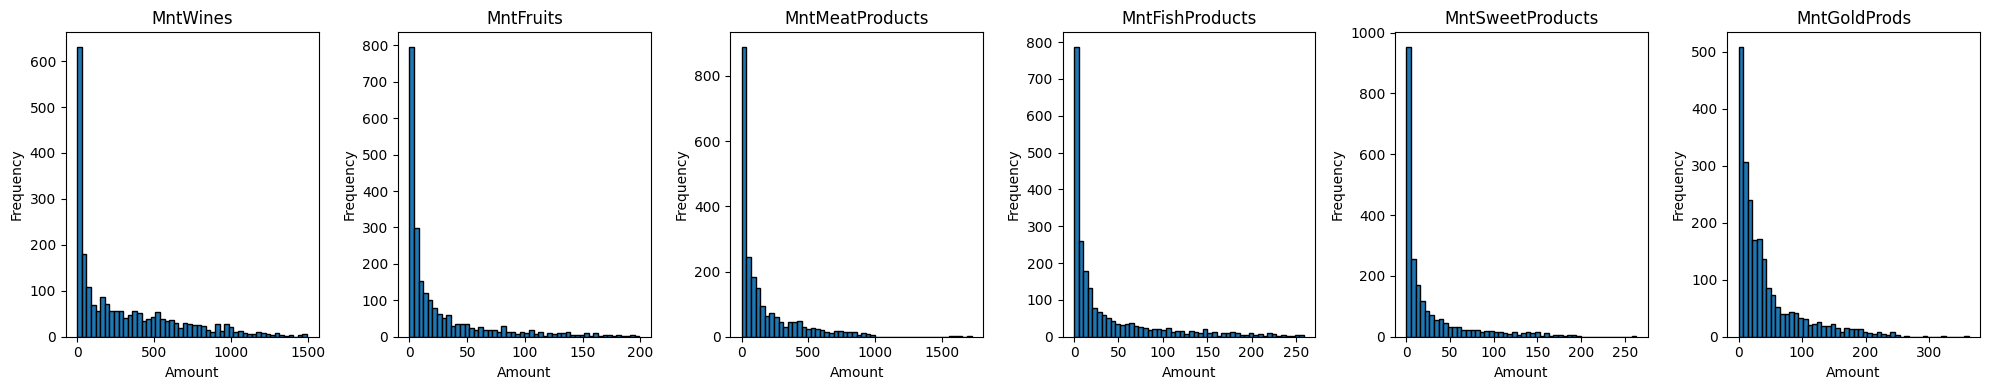

In [66]:
products = ["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]

fig, axes = plt.subplots(1, len(products), figsize=(20, 4))  # Una fila, tantas columnas como features

for col, ax in zip(products, axes):
    ax.hist(df[col], bins=50, edgecolor="black")
    ax.set_title(col)
    ax.set_xlabel("Amount")
    ax.set_ylabel("Frequency")

plt.tight_layout()
plt.show()

##### - ('Total_Spent')

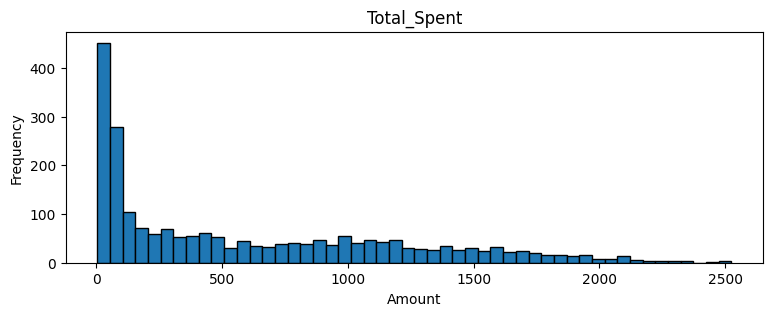

In [67]:
# Nueva columna con el total gastado 
df["Total_Spent"] = df[["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]].sum(axis=1) # Axis 1 (suma por filas)

plt.figure(figsize=(9,3))
plt.hist(df["Total_Spent"], bins=50, edgecolor="black")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.title("Total_Spent")
plt.show()

In [68]:
# Comprobación de que siempre se ha comprado algo
df.loc[(df['Total_Spent'] == 0)]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Children,Family_Size,Total_Spent


##### - ('Avg_purcharse')

In [69]:
# Nueva columna, para el promedio de gasto por compra
df["Avg_purcharse"] = round(df["Total_Spent"] / (df["NumWebPurchases"] + df["NumCatalogPurchases"] + df["NumStorePurchases"]),3)
df.head(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Children,Family_Size,Total_Spent,Avg_purcharse
0,5524,1957,Graduate,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,3,11,1,68,0,1,1617,73.50
1,2174,1954,Graduate,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,3,11,0,71,2,3,27,6.75
2,4141,1965,Graduate,Couple,71613.0,0,0,2013-08-21,26,426,...,0,0,3,11,0,60,0,1,776,38.80


#### C) *place* features

##### - "NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases", "NumWebVisitsMonth"

- Outliers, pero dentro de lo normal (posibles transformaciones logarítimicas en la fase de feature engineering)
- Checkeo datos erroneos (cero en gasto en todas los canales de compra)

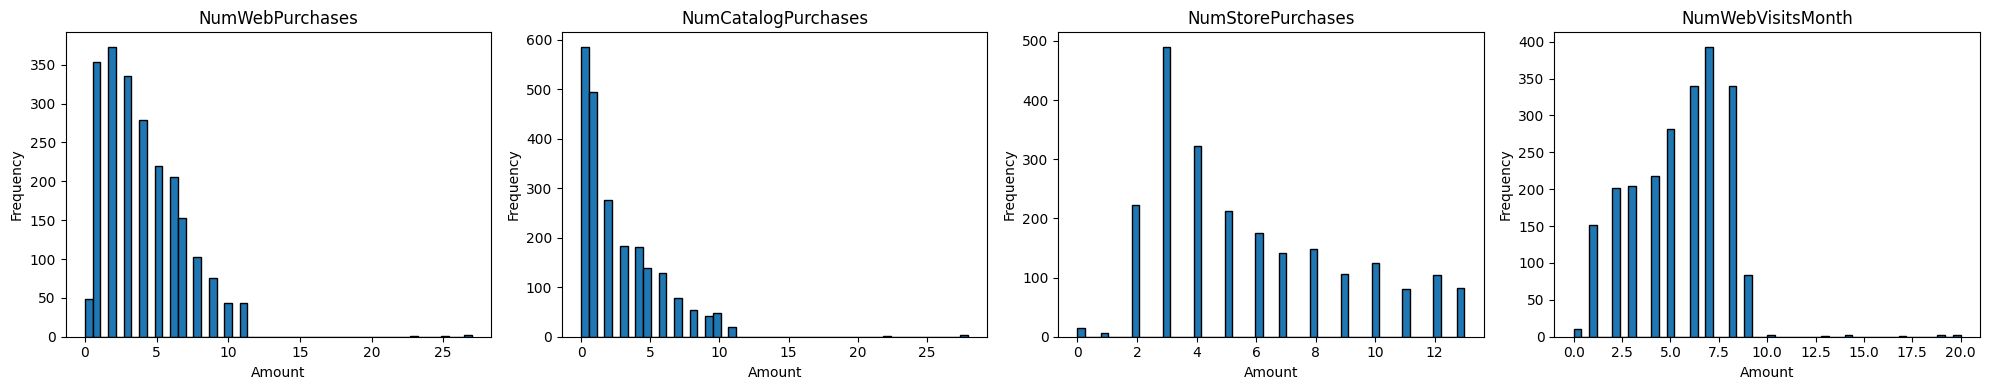

In [70]:
purchases = ["NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases","NumWebVisitsMonth"]

fig, axes = plt.subplots(1, len(purchases), figsize=(20, 4))  # Una fila, tantas columnas como features

for col, ax in zip(purchases, axes):
    ax.hist(df[col], bins=50, edgecolor="black")
    ax.set_title(col)
    ax.set_xlabel("Amount")
    ax.set_ylabel("Frequency")

plt.tight_layout()
plt.show()

In [71]:
df[purchases].describe()

,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
count,2236.000000,2236.000000,2236.000000,2236.000000
mean,4.082737,2.659213,5.789356,5.317531
std,2.779736,2.920752,3.253756,2.424756
min,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,3.000000,3.000000
50%,4.000000,2.000000,5.000000,6.000000
75%,6.000000,4.000000,8.000000,7.000000
max,27.000000,28.000000,13.000000,20.000000


- Checkeo datos erroneos: Seis clientes no han realizado compras por ningun canal, por lo que es mejor borrarlos.

In [72]:
# Checkeo
df.loc[(df['NumWebPurchases'] == 0) & (df['NumCatalogPurchases'] == 0) & (df['NumStorePurchases'] == 0), purchases]

,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
655,0,0,0,0
981,0,0,0,14
1245,0,0,0,20
1524,0,0,0,14
1846,0,0,0,19
2132,0,0,0,0


In [73]:
# Eliminación de seis filas erroneas
values_to_drop_2 = df[(df['NumWebPurchases'] == 0) & (df['NumCatalogPurchases'] == 0) & (df['NumStorePurchases'] == 0)].index
df.drop(index=values_to_drop_2, inplace=True)
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Children,Family_Size,Total_Spent,Avg_purcharse
0,5524,1957,Graduate,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,3,11,1,68,0,1,1617,73.500
1,2174,1954,Graduate,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,3,11,0,71,2,3,27,6.750
2,4141,1965,Graduate,Couple,71613.0,0,0,2013-08-21,26,426,...,0,0,3,11,0,60,0,1,776,38.800
3,6182,1984,Graduate,Couple,26646.0,1,0,2014-02-10,26,11,...,0,0,3,11,0,41,1,2,53,8.833
4,5324,1981,Postgraduate,Couple,58293.0,1,0,2014-01-19,94,173,...,0,0,3,11,0,44,1,2,422,30.143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduate,Couple,61223.0,0,1,2013-06-13,46,709,...,0,0,3,11,0,58,1,2,1341,83.812
2236,4001,1946,Postgraduate,Couple,64014.0,2,1,2014-06-10,56,406,...,0,0,3,11,0,79,3,4,444,29.600
2237,7270,1981,Graduate,Single,56981.0,0,0,2014-01-25,91,908,...,0,0,3,11,0,44,0,1,1241,68.944
2238,8235,1956,Postgraduate,Couple,69245.0,0,1,2014-01-24,8,428,...,0,0,3,11,0,69,1,2,843,40.143


#### D) *promotion* features

##### "NumDealsPurchases", "AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "Response"

- NumDealsPurchases, compras realizadas con descuento u oferta  (posibles transformaciones logarítimicas en la fase de feature engineering)
- Promoción aceptó la oferta en camapaña num_X  (0: NO , 1 : SI)
- Response, aceptó la ultima oferta (0: NO , 1 : SI)
- Sin accion

In [74]:
df.Response.value_counts()

Response
0    1898
1     332
Name: count, dtype: int64

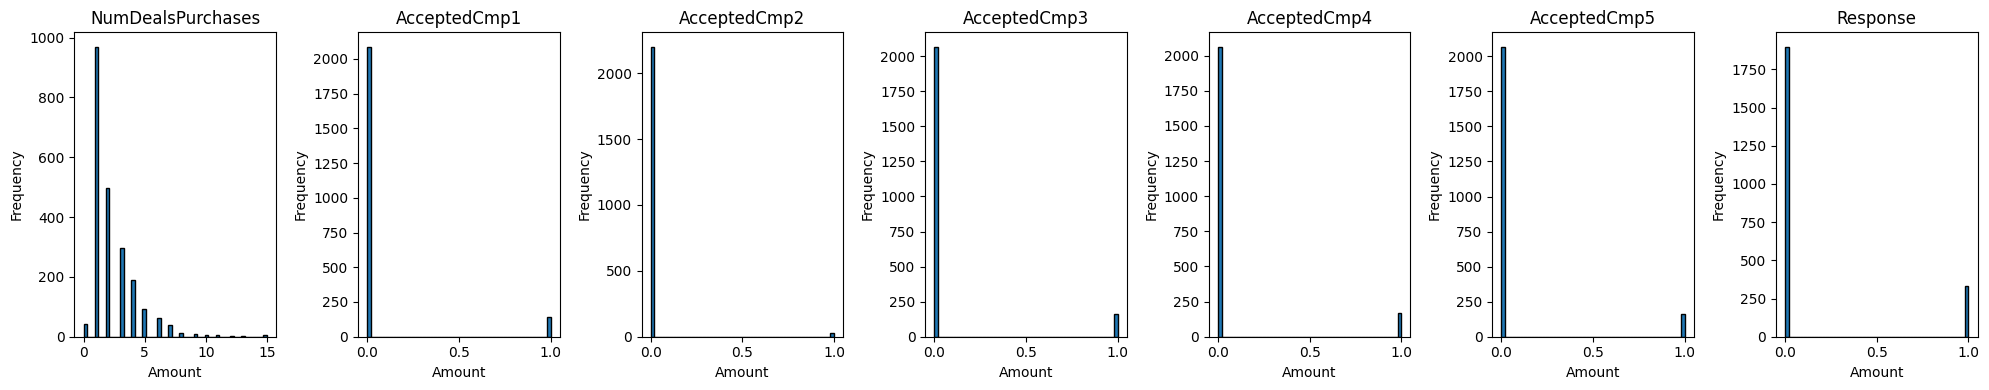

In [75]:
promotion = ["NumDealsPurchases", "AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "Response"]

fig, axes = plt.subplots(1, len(promotion), figsize=(20, 4))  # Una fila, tantas columnas como features

for col, ax in zip(promotion, axes):
    ax.hist(df[col], bins=50, edgecolor="black")
    ax.set_title(col)
    ax.set_xlabel("Amount")
    ax.set_ylabel("Frequency")

plt.tight_layout()
plt.show()

In [76]:
df[promotion].describe()

,NumDealsPurchases,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
count,2230.000000,2230.000000,2230.000000,2230.000000,2230.000000,2230.000000,2230.000000
mean,2.315695,0.064126,0.013453,0.073094,0.074888,0.072646,0.148879
std,1.894450,0.245031,0.115230,0.260349,0.263269,0.259612,0.356049
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,15.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##### - ('Total_Campaigns_Accepted')

In [77]:
df["Total_Campaigns_Accepted"] = df["AcceptedCmp1"] + df["AcceptedCmp2"] + df["AcceptedCmp3"] + df["AcceptedCmp4"] + df["AcceptedCmp5"] + df["Response"]
df["Total_Campaigns_Accepted"].value_counts()

Total_Campaigns_Accepted
0    1623
1     369
2     142
3      50
4      36
5      10
Name: count, dtype: int64

### 4.2. Dropping Columns, Renaming and Reordering Features

In [78]:
print(exclude)
df_backup_V1 = df.copy()

# Borrado de las columnas a excluir
df = df.drop(columns=exclude, axis=1)
df.head(5)

['Z_CostContact', 'Z_Revenue', 'ID', 'Year_Birth', 'Kidhome', 'Teenhome']


,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Children,Family_Size,Total_Spent,Avg_purcharse,Total_Campaigns_Accepted
0,Graduate,Single,58138.0,2012-09-04,58,635,88,546,172,88,...,0,0,0,1,68,0,1,1617,73.500,1
1,Graduate,Single,46344.0,2014-03-08,38,11,1,6,2,1,...,0,0,0,0,71,2,3,27,6.750,0
2,Graduate,Couple,71613.0,2013-08-21,26,426,49,127,111,21,...,0,0,0,0,60,0,1,776,38.800,0
3,Graduate,Couple,26646.0,2014-02-10,26,11,4,20,10,3,...,0,0,0,0,41,1,2,53,8.833,0
4,Postgraduate,Couple,58293.0,2014-01-19,94,173,43,118,46,27,...,0,0,0,0,44,1,2,422,30.143,0


In [80]:
people_dict = {
    "Age": "Age",
    "Education": "Education",
    "Income": "Income",
    "Marital_Status": "Status",
    "Children": "Children",
    "Family_Size": "Fam_size",
    "Dt_Customer": "Client_date",
    "Recency": "Recency",
    "Complain": "Complain"
}

products_dict = {
    "MntWines": "Wines",
    "MntFruits": "Fruits",
    "MntMeatProducts": "Meat",
    "MntFishProducts": "Fish",
    "MntSweetProducts": "Sweets",
    "MntGoldProds": "Gold",
    "Total_Spent": "Total_spent",
    "Avg_purcharse": "Avg_buy"
}

place_dict = {
    "NumWebPurchases": "Web",
    "NumCatalogPurchases": "Catalog",
    "NumStorePurchases": "Store",
    "NumWebVisitsMonth": "WebVisits"
}

promotion_dict = {
    "NumDealsPurchases": "Deals",
    "AcceptedCmp1": "Cmp1",
    "AcceptedCmp2": "Cmp2",
    "AcceptedCmp3": "Cmp3",
    "AcceptedCmp4": "Cmp4",
    "AcceptedCmp5": "Cmp5",
    "Response": "Response",
    "Total_Campaigns_Accepted": "Total_cmp"
}

# Renombrar primero las columnas y luego reordenar
df = df.rename(columns={**people_dict, **products_dict, **place_dict, **promotion_dict})

# Extraer listas de nombres renombrados
people = list(people_dict.values())
products = list(products_dict.values())
place = list(place_dict.values())
promotion = list(promotion_dict.values())

# Reordenar columnas según el orden deseado
new_order = people + products + place + promotion

# Aplicar el reordenamiento
df = df[new_order]
df.head()

,Age,Education,Income,Status,Children,Fam_size,Client_date,Recency,Complain,Wines,...,Store,WebVisits,Deals,Cmp1,Cmp2,Cmp3,Cmp4,Cmp5,Response,Total_cmp
0,68,Graduate,58138.0,Single,0,1,2012-09-04,58,0,635,...,4,7,3,0,0,0,0,0,1,1
1,71,Graduate,46344.0,Single,2,3,2014-03-08,38,0,11,...,2,5,2,0,0,0,0,0,0,0
2,60,Graduate,71613.0,Couple,0,1,2013-08-21,26,0,426,...,10,4,1,0,0,0,0,0,0,0
3,41,Graduate,26646.0,Couple,1,2,2014-02-10,26,0,11,...,4,6,2,0,0,0,0,0,0,0
4,44,Postgraduate,58293.0,Couple,1,2,2014-01-19,94,0,173,...,6,5,5,0,0,0,0,0,0,0


In [81]:
df[people].head(3)

,Age,Education,Income,Status,Children,Fam_size,Client_date,Recency,Complain
0,68,Graduate,58138.0,Single,0,1,2012-09-04,58,0
1,71,Graduate,46344.0,Single,2,3,2014-03-08,38,0
2,60,Graduate,71613.0,Couple,0,1,2013-08-21,26,0


In [82]:
df[products].head(3)

,Wines,Fruits,Meat,Fish,Sweets,Gold,Total_spent,Avg_buy
0,635,88,546,172,88,88,1617,73.50
1,11,1,6,2,1,6,27,6.75
2,426,49,127,111,21,42,776,38.80


In [83]:
df[place].head(3)

,Web,Catalog,Store,WebVisits
0,8,10,4,7
1,1,1,2,5
2,8,2,10,4


In [84]:
df[promotion].head(3)

,Deals,Cmp1,Cmp2,Cmp3,Cmp4,Cmp5,Response,Total_cmp
0,3,0,0,0,0,0,1,1
1,2,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2230 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Age          2230 non-null   int64         
 1   Education    2230 non-null   object        
 2   Income       2230 non-null   float64       
 3   Status       2230 non-null   object        
 4   Children     2230 non-null   int64         
 5   Fam_size     2230 non-null   int64         
 6   Client_date  2230 non-null   datetime64[ns]
 7   Recency      2230 non-null   int64         
 8   Complain     2230 non-null   int64         
 9   Wines        2230 non-null   int64         
 10  Fruits       2230 non-null   int64         
 11  Meat         2230 non-null   int64         
 12  Fish         2230 non-null   int64         
 13  Sweets       2230 non-null   int64         
 14  Gold         2230 non-null   int64         
 15  Total_spent  2230 non-null   int64         
 16  Avg_buy    